### Import Libraries

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.options.display.max_rows = 1000

### Import Dataset

In [5]:
# Importing the datasets
train_df = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train_df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
stores.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

In [10]:
features.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [11]:
features.nunique()

Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64

In [12]:
features.shape

(8190, 12)

50% or more data from markdown{1, 2, 3, 4} columns of features are missing

In [14]:
df = train_df.merge(features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')

In [15]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
dtype: int64

## Visualization

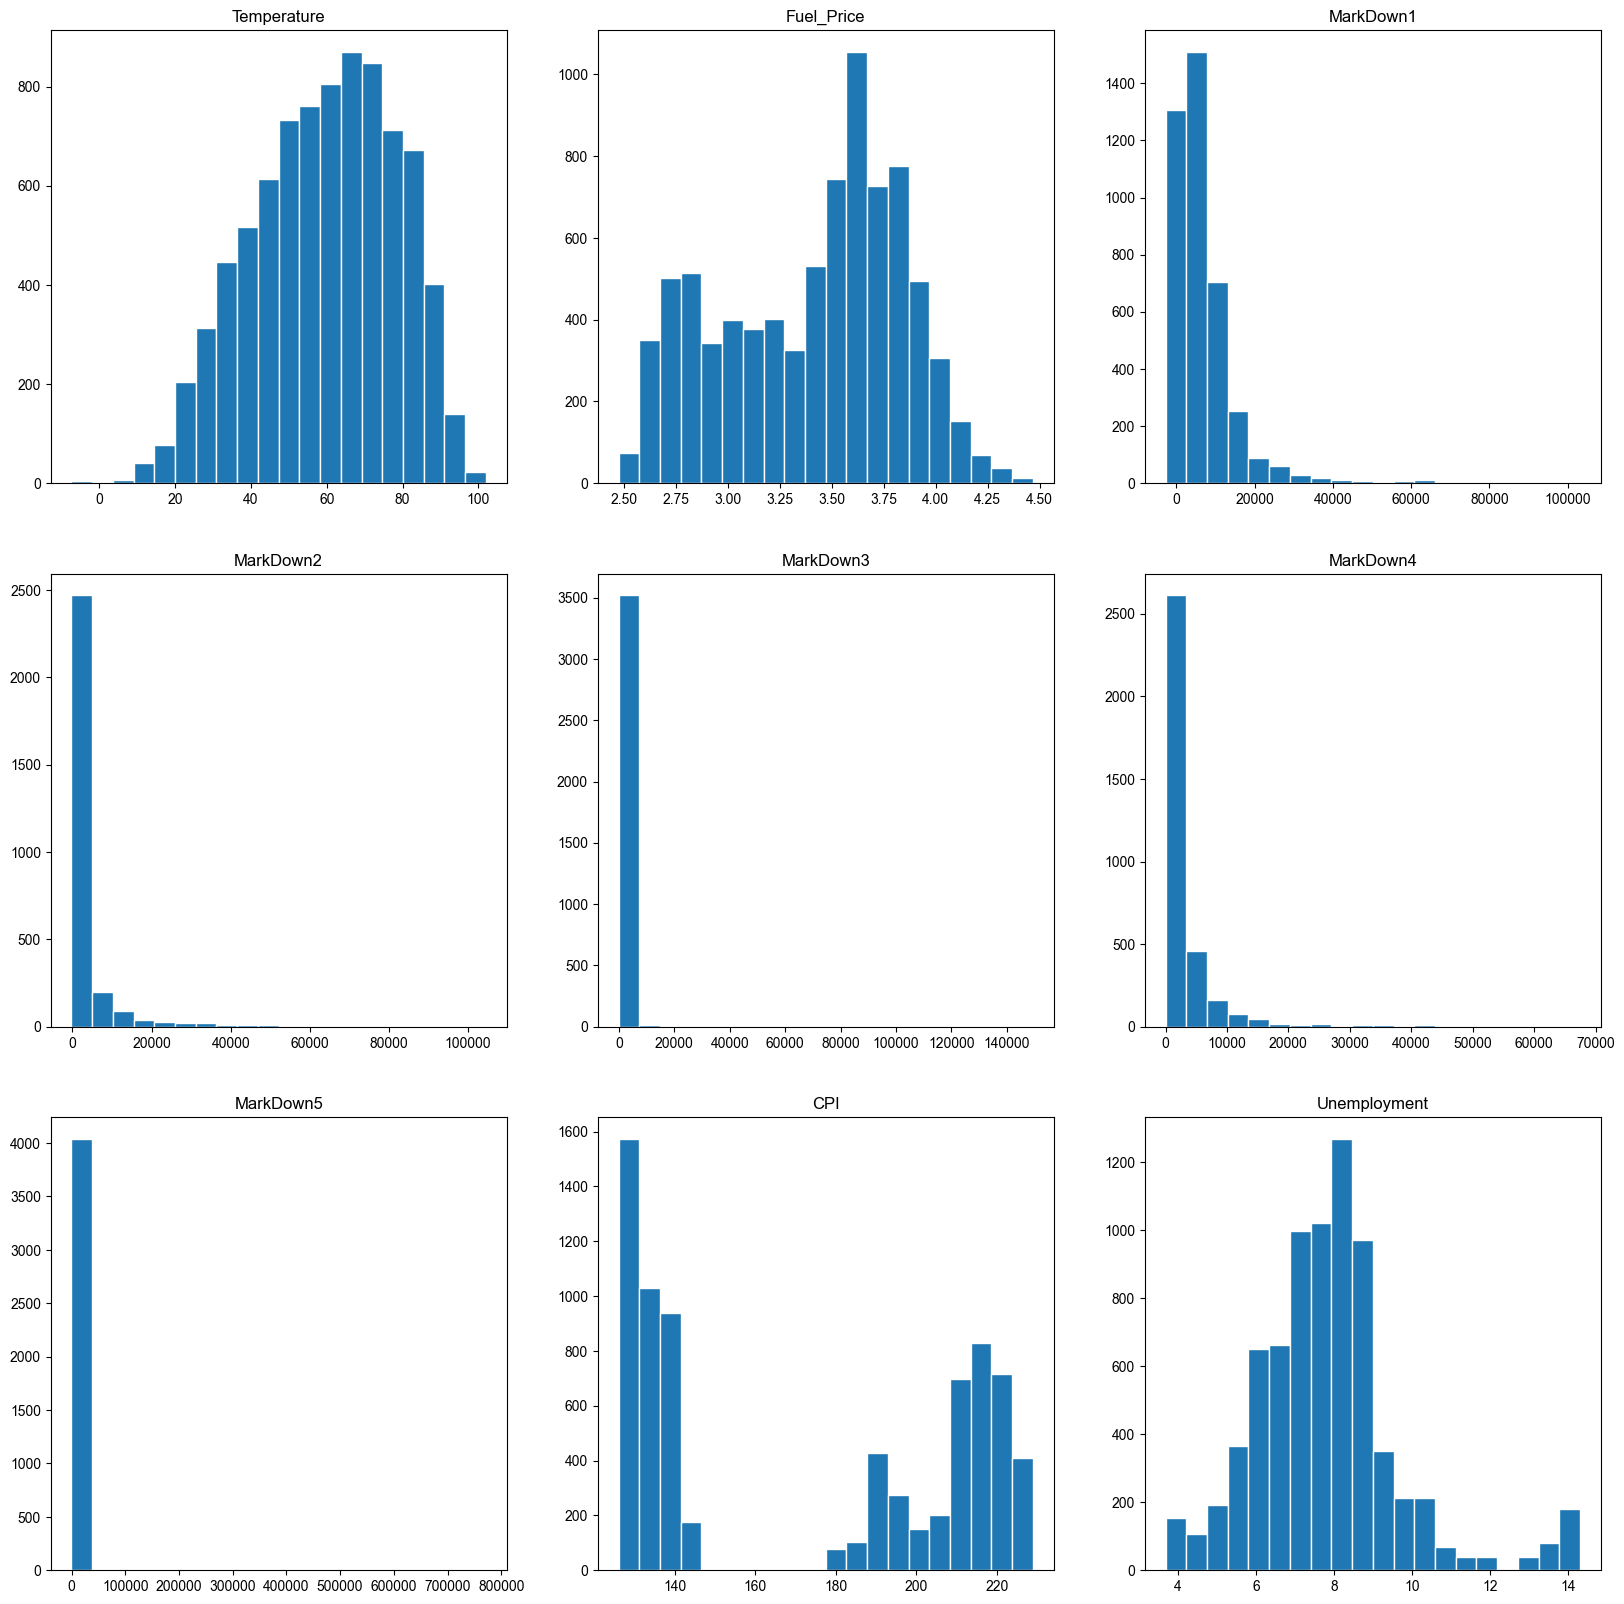

In [17]:
fig, axs = plt.subplots(3, 3, figsize = (20, 20))

cnt = 2
sns.set_style("darkgrid")

for ax in axs.reshape(-1):
    ax.hist(features.iloc[:, cnt], bins = 20) 
    ax.set_title(features.columns[cnt])
    cnt += 1

huge outliers

In [19]:
num_feature_cols = ["Temperature", "Fuel_Price", "MarkDown1", "MarkDown2" ,	"MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment"]
num_features = features[num_feature_cols]

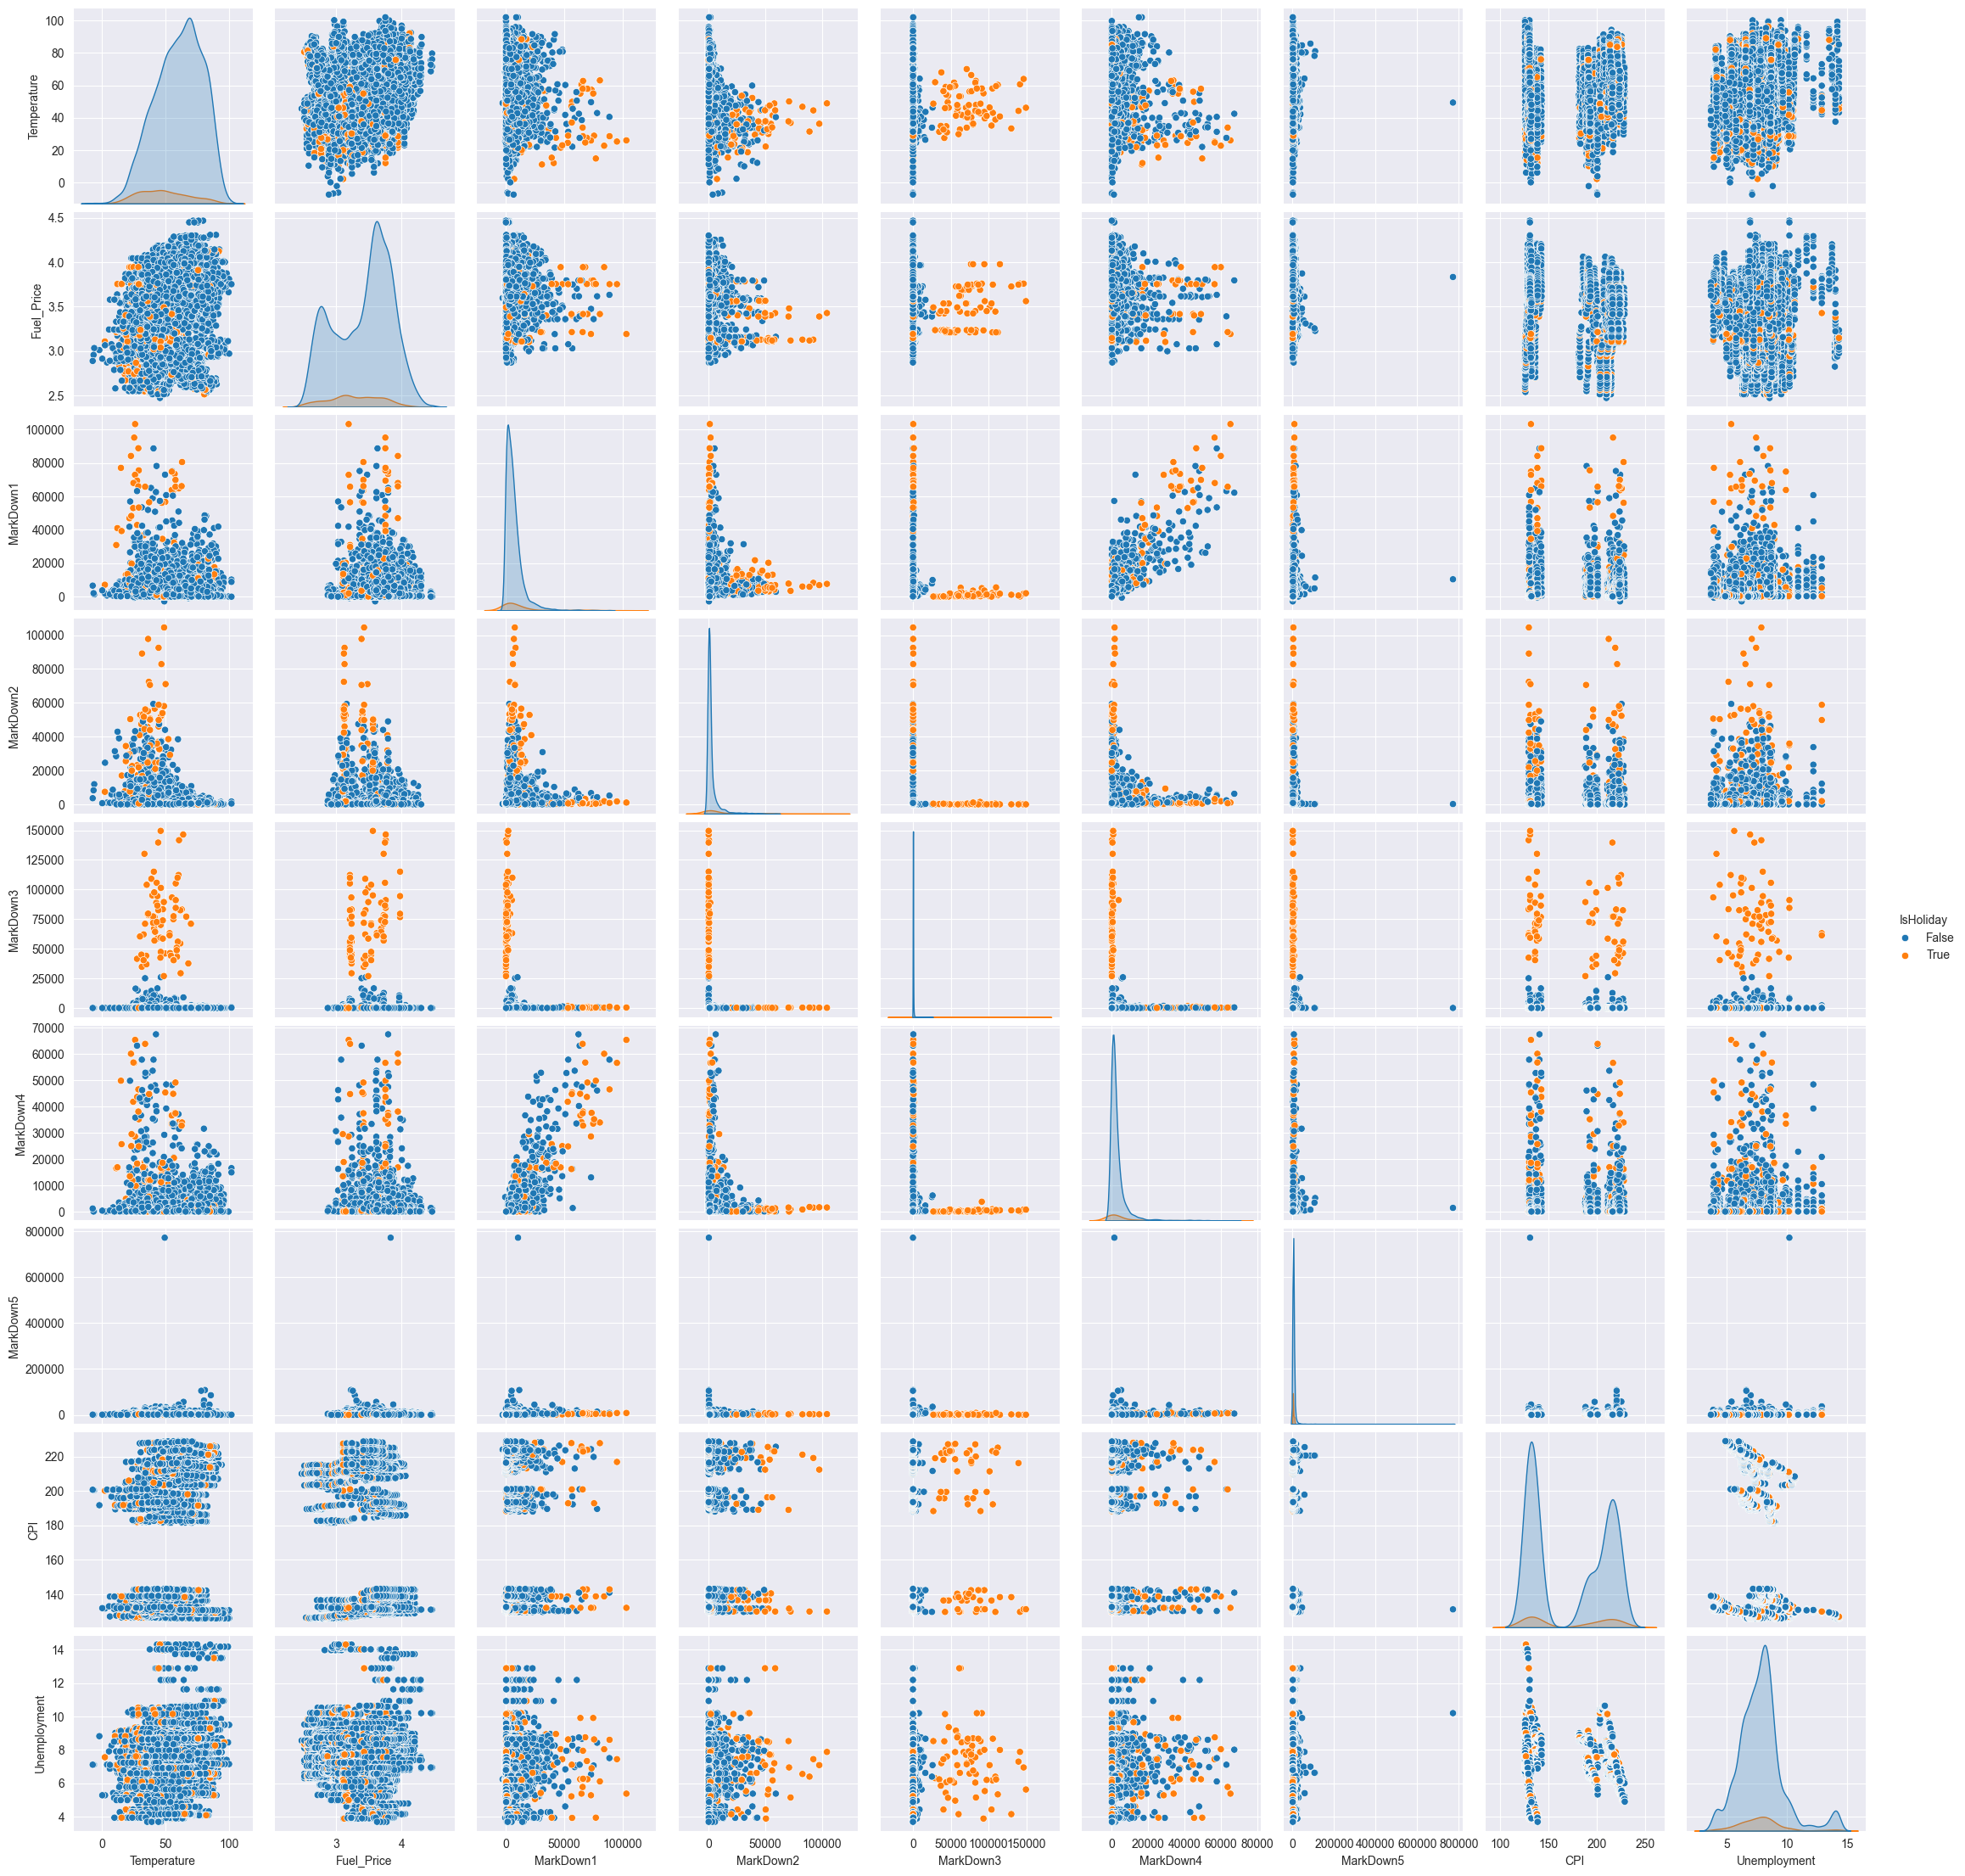

In [20]:
selected_cols = ["Temperature", "Fuel_Price", "MarkDown1", "MarkDown2" ,	"MarkDown3", "MarkDown4", "MarkDown5", "CPI", "Unemployment", "IsHoliday"]
df_temp = features[selected_cols]

sns.pairplot(data = df_temp, hue = 'IsHoliday')

Features don't seem to have any correlation with each other, which is good for training \
Markdown and CPI values tends to be near zero when it's not holiday \

In [22]:
# create a final merge 
final_df = df.merge(stores, on = 'Store', how = 'left')

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


<Axes: >

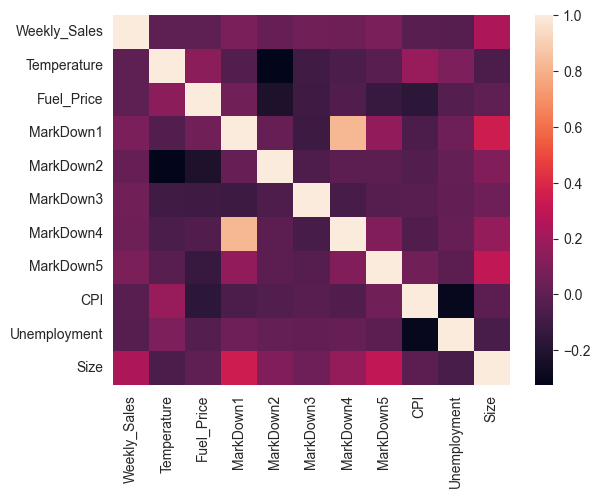

In [24]:
# heatmap of all numerical variable in the merged df
sns.heatmap(final_df.iloc[: , [3] + list(range(5, 14)) + [15]].corr())

Not strong correlation with weekly_sales for any of these features \
MarkDown 1 and MarkDown 4 are somewhat positively correlated \
Size of store seems to be weakly correlated with Weekly_Sales, Markdown 1 and 5

I suppose we don't have to handle missing values since it's just a visualization task

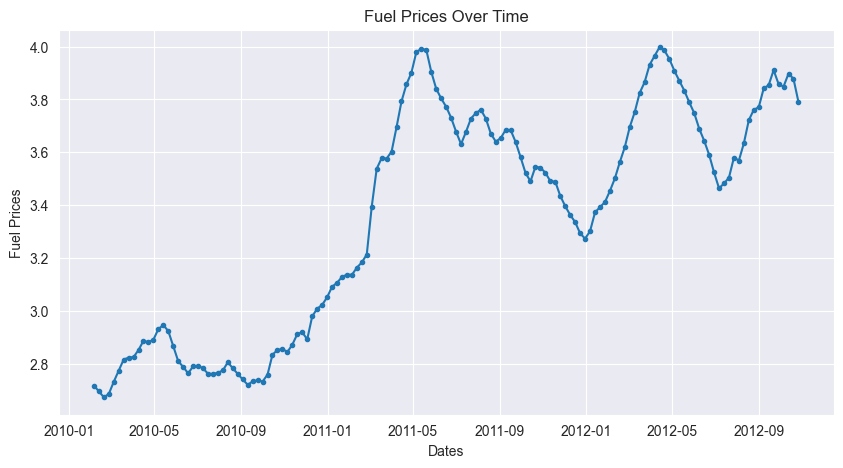

In [27]:
# plot fuel price over time using merged data
Fuel_trend = final_df.groupby('Date')['Fuel_Price'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(np.asarray(Fuel_trend['Date'], dtype='datetime64[s]'), Fuel_trend['Fuel_Price'], 'd', linestyle = '-', marker = 'o', markersize = 3)

plt.title('Fuel Prices Over Time')
plt.xlabel('Dates')
plt.ylabel('Fuel Prices')

plt.show()

In [28]:
final_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

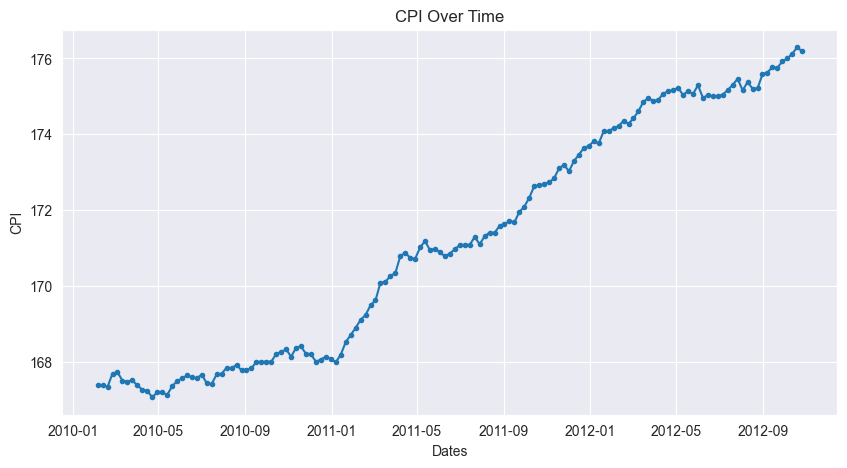

In [29]:
# plot CPI over time
CPI_trend = final_df.groupby('Date')['CPI'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(np.asarray(CPI_trend['Date'], dtype='datetime64[s]'), CPI_trend['CPI'], 'd', linestyle = '-', marker = 'o' , markersize = 3)

plt.title('CPI Over Time')
plt.xlabel('Dates')
plt.ylabel('CPI')

plt.show()

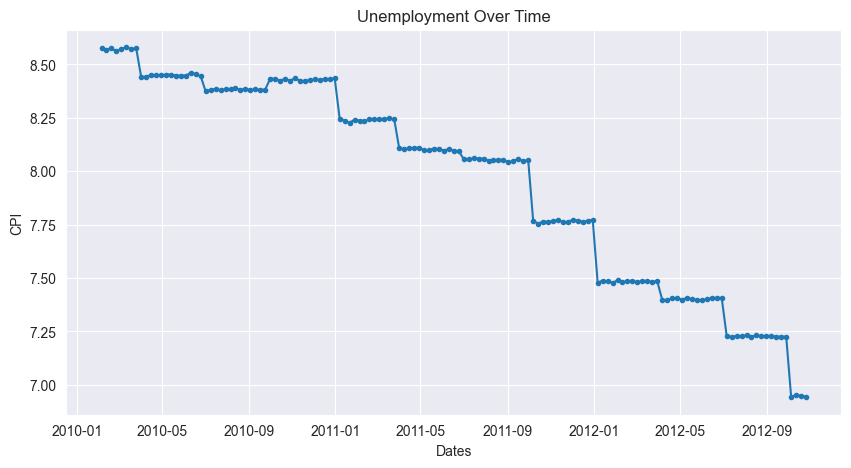

In [30]:
Unemployment_trend = final_df.groupby('Date')['Unemployment'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(np.asarray(Unemployment_trend['Date'], dtype='datetime64[s]'), Unemployment_trend['Unemployment'], 'd', linestyle = '-', marker = 'o' , markersize = 3)

plt.title('Unemployment Over Time')
plt.xlabel('Dates')
plt.ylabel('CPI')

plt.show()

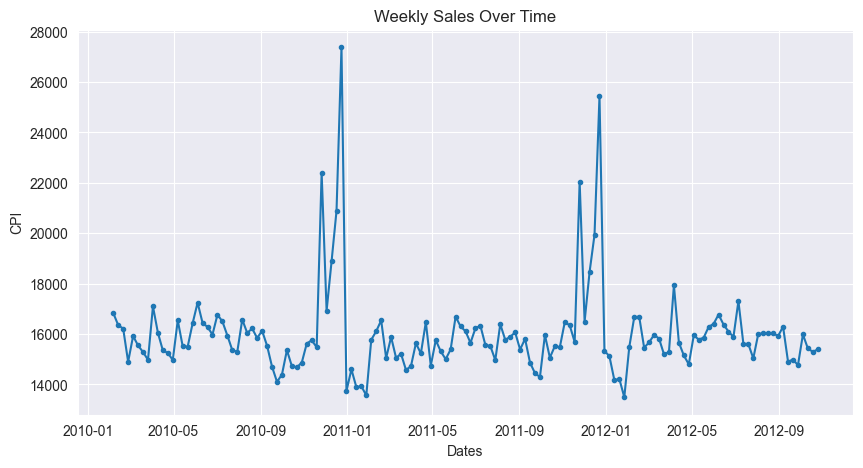

In [31]:
weekly_sales_trend = final_df.groupby('Date')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
plt.plot(np.asarray(weekly_sales_trend['Date'], dtype='datetime64[s]'), weekly_sales_trend['Weekly_Sales'], 'd', linestyle = '-', marker = 'o' , markersize = 3)

plt.title('Weekly Sales Over Time')
plt.xlabel('Dates')
plt.ylabel('CPI')

plt.show()

In [32]:
def min_max_scale(series):
    min_val = series.min()
    max_val = series.max()
    return (series - min_val) / (max_val - min_val)

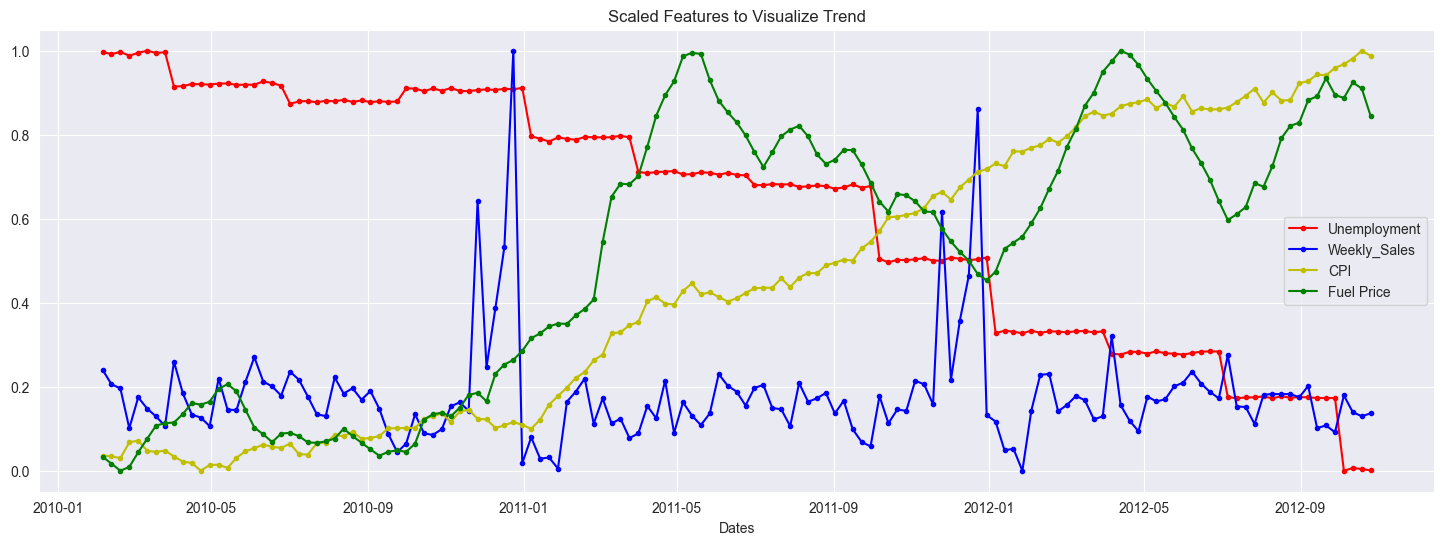

In [33]:
plt.figure(figsize=(18, 6))

plt.plot(np.asarray(Unemployment_trend['Date'], dtype='datetime64[s]'), min_max_scale(Unemployment_trend['Unemployment']), 'd', linestyle = '-', marker = 'o' , markersize = 3, c = 'r')
plt.plot(np.asarray(weekly_sales_trend['Date'], dtype='datetime64[s]'), min_max_scale(weekly_sales_trend['Weekly_Sales']), 'd', linestyle = '-', marker = 'o' , markersize = 3, c = 'b')
plt.plot(np.asarray(CPI_trend['Date'], dtype='datetime64[s]'), min_max_scale(CPI_trend['CPI']), 'd', linestyle = '-', marker = 'o' , markersize = 3, c = 'y')
plt.plot(np.asarray(Fuel_trend['Date'], dtype='datetime64[s]'), min_max_scale(Fuel_trend['Fuel_Price']), 'd', linestyle = '-', marker = 'o', markersize = 3, c = 'g')

plt.legend(['Unemployment', 'Weekly_Sales', "CPI", "Fuel Price"])
plt.title('Scaled Features to Visualize Trend')
plt.xlabel('Dates')
plt.show()

Weekly Sales has a weak, negative correlation with Fuel Price after 2010-09 \
Unemployment rate starts to drop significantly at around 2011-01, so sth happened there, since it is not an coincidence that Weekly sales reached such a high bar \
CPI is simply increasing.